In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [50]:
dataset = pd.read_csv('test.csv')

In [51]:
dataset
# bai toan tim ra cac tai khoan ngan hang loi, bang cach tim ra cac outliers, 
# cot class la tai khoan do da duoc approval hay chua, neu tai khoan co loi ma duoc approval thi se nguy hiem

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15613699,1,37.33,6.500,2,7,8,4.250,1,1,12,1,2,93,1,1
1,15609758,0,20.75,9.540,2,3,4,0.040,0,0,0,0,2,200,1001,0
2,15762392,1,36.67,3.250,2,11,8,9.000,1,0,0,1,2,102,640,1
3,15693382,1,22.58,10.040,2,14,4,0.040,1,1,9,0,2,60,397,1
4,15791769,0,26.92,13.500,2,11,8,5.000,1,1,2,0,2,0,5001,1
5,15712483,0,46.67,0.460,2,13,8,0.415,1,1,11,1,2,440,7,1
6,15636454,0,52.17,0.000,1,1,1,0.000,0,0,0,0,2,0,1,0
7,15710138,1,39.17,2.500,1,3,8,10.000,0,0,0,1,1,200,1,0
8,15571571,1,39.17,1.625,2,8,4,1.500,1,1,10,0,2,186,4701,1
9,15638751,0,27.67,2.040,2,9,4,0.250,0,0,0,1,2,180,51,0


In [52]:
# Id de tim ra tai khoan loi
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [53]:
type(y)

numpy.ndarray

In [54]:
# Features scaling (cho cac feature trong khoang 0-1)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.18172832, 1.        , 0.55263158, ..., 1.        , 0.10021552,
        0.        ],
       [0.16556329, 0.        , 0.11631579, ..., 1.        , 0.21551724,
        0.10204082],
       [0.79163078, 1.        , 0.53526316, ..., 1.        , 0.10991379,
        0.06520408],
       ...,
       [0.43501587, 0.        , 0.06578947, ..., 1.        , 0.10775862,
        0.        ],
       [0.84947374, 0.        , 0.29184211, ..., 1.        , 0.12931034,
        0.00112245],
       [0.09441423, 1.        , 0.64921053, ..., 0.        , 0.60344828,
        0.        ]])

In [55]:
# Train the SOM
from minisom import MiniSom

In [56]:
som = MiniSom(x = 10, y = 10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X, num_iteration=100)

In [57]:
#Visualize the result
from pylab import bone, pcolor, colorbar, plot, show

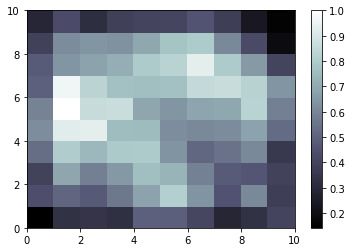

In [58]:
bone()
pcolor(som.distance_map().T)
colorbar()

In [59]:
som.distance_map()

array([[0.14230128, 0.44370022, 0.39652421, 0.53476652, 0.62434782,
        0.59238365, 0.49663642, 0.48267768, 0.39041053, 0.29174062],
       [0.33346387, 0.51323968, 0.68863268, 0.80405909, 0.92403695,
        1.        , 0.96100136, 0.64340271, 0.62033341, 0.43298596],
       [0.34565802, 0.47878049, 0.58601195, 0.73921153, 0.93166958,
        0.86093618, 0.83148158, 0.67900502, 0.64302735, 0.32264436],
       [0.32770879, 0.56310203, 0.65200379, 0.79425707, 0.7554079 ,
        0.86808279, 0.76560531, 0.71281838, 0.63334184, 0.38868553],
       [0.49674876, 0.67837046, 0.7613467 , 0.79900412, 0.74932994,
        0.69025317, 0.76126529, 0.7970633 , 0.6920724 , 0.40496791],
       [0.49297261, 0.81372366, 0.73167195, 0.64068533, 0.62330673,
        0.64182255, 0.7673741 , 0.82851897, 0.77557332, 0.4083952 ],
       [0.41132814, 0.64148606, 0.58982611, 0.51654015, 0.61013067,
        0.68528002, 0.85504177, 0.93259893, 0.79768048, 0.4597043 ],
       [0.28701396, 0.45693018, 0.4834447

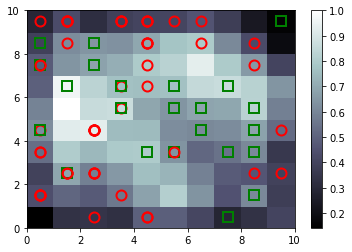

In [60]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
# i is the index in X, x is each vector in each iteration
for i, x in enumerate(X):
    w = som.winner(x) # find the winning node for vector x
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [61]:
# Find the frauds
mappings = som.win_map(X)
type(mappings)

collections.defaultdict

In [63]:
frauds = np.concatenate((mappings[(1,5)], mappings[(1,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds

ValueError: all the input arrays must have same number of dimensions

In [71]:
a = mappings[(2,4)] 
sc.inverse_transform(a)

array([[1.5609758e+07, 0.0000000e+00, 2.0750000e+01, 9.5400000e+00,
        2.0000000e+00, 3.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 1.0010000e+03],
       [1.5611682e+07, 0.0000000e+00, 2.0080000e+01, 1.2500000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.5608916e+07, 0.0000000e+00, 1.7670000e+01, 0.0000000e+00,
        1.0000000e+00, 5.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.6000000e+01, 1.0000000e+00],
       [1.5615296e+07, 0.0000000e+00, 1.7920000e+01, 1.0210000e+01,
        2.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,